In [8]:
from os import getcwd
from os.path import join, basename
from sys import path 

libs_dir = join("/".join(getcwd().split("/")[:-1]))
path.append(libs_dir)

filename = basename(globals()['__vsc_ipynb_file__']).split(".")[0]

import numpy as np
from libs.qchannel_model import *
import matplotlib.pyplot as plt
from libs.figure_config import *
from libs.default_parameters import *
from numpy.polynomial.laguerre import laggauss

In [9]:
# n_s = 0.8


In [10]:
tau_zen_list = np.array([0.75])
zenith_angle_deg_list = np.linspace(0, 60, 1)

qber_values = np.zeros((len(tau_zen_list), len(zenith_angle_deg_list)))
yield_values = np.zeros((len(tau_zen_list), len(zenith_angle_deg_list)))
skr_values = np.zeros((len(tau_zen_list), len(zenith_angle_deg_list)))

In [11]:
# def compute_avg_qber_closed_form(
#         sigma_theta_x, sigma_theta_y, slant_distance,
#         mu_x, mu_y, zenith_angle_rad, h_OGS, h_atm, w_L, tau_zen,
#         Cn2_profile, a, e_0, p_dark, e_pol, p_AP, n_s, wavelength,
#         n_num, n_den):
#     sigma_x = sigma_theta_x * slant_distance
#     sigma_y = sigma_theta_y * slant_distance

#     w_Leq_squared = equivalent_beam_width_squared(a, w_L)
#     w_Leq = np.sqrt(w_Leq_squared)
#     sigma_mod = compute_sigma_mod(mu_x, mu_y, sigma_x, sigma_y)
#     varphi_mod = sigma_to_variance(sigma_mod, w_Leq)

#     x, w = gauss_laguerre_table(n_num)
#     avg_err_bits = 0

#     for idx in range(n_num):
#         avg_err_bits += (
#             w[idx] * np.exp(x[idx])
#             * transmitivity_pdf(x[idx], mu_x, mu_y, sigma_x, sigma_y,
#                 zenith_angle_rad, w_L, w_Leq, tau_zen, varphi_mod,
#                 wavelength, h_OGS, h_atm, Cn2_profile, a)
#             * (
#                 e_0 * (p_dark*(1+p_AP)) 
#                 + (e_pol+e_0*p_AP) * (1-np.exp(-n_s*x[idx]))
#             )
#         )
    
#     # def integrand_2(eta):
#     #     term_1 = transmitivity_pdf(
#     #         eta, mu_x, mu_y, sigma_x, sigma_y, zenith_angle_rad,
#     #         w_L, w_Leq, tau_zen, varphi_mod, wavelength, h_OGS,
#     #         h_atm, Cn2_profile, a)
#     #     term_2 = compute_yield(eta, n_s, p_dark, p_AP)

#     #     return term_1 * term_2

#     # avg_yield, _ = quad(integrand_2, 0, np.inf, limit=100, epsabs=1e-9, epsrel=1e-9)

#     return avg_err_bits

In [12]:
n_num = 30


In [13]:
for idx in range(len(tau_zen_list)):
    tau_zen = tau_zen_list[idx]
    for jdx in range(len(zenith_angle_deg_list)):
        zenith_angle_deg = zenith_angle_deg_list[jdx]
        
        if zenith_angle_deg < 0:
            zenith_angle_rad = np.radians(-zenith_angle_deg)
        else:
            zenith_angle_rad = np.radians(zenith_angle_deg)

        slant_distance = compute_slant_distance(h_s, h_OGS, zenith_angle_rad)
        w_L = slant_distance * theta_rad

        sigma_x = sigma_theta_x * slant_distance
        sigma_y = sigma_theta_y * slant_distance

        w_Leq_squared = equivalent_beam_width_squared(a, w_L)
        w_Leq = np.sqrt(w_Leq_squared)
        sigma_mod = compute_sigma_mod(mu_x, mu_y, sigma_x, sigma_y)
        varphi_mod = sigma_to_variance(sigma_mod, w_Leq)

        # x, w = gauss_laguerre_table(n_num)

        # avg_err_bits_closed_form = 0

        # for kdx in range(n_num):
        #     avg_err_bits_closed_form += (
        #         w[kdx] * np.exp(x[kdx])
        #         * transmitivity_pdf(x[kdx], mu_x, mu_y, sigma_x, sigma_y,
        #             zenith_angle_rad, w_L, w_Leq, tau_zen, varphi_mod,
        #             wavelength, h_OGS, h_atm, Cn2_profile, a)
        #         * (
        #             e_0 * (p_dark*(1+p_AP)) 
        #             + (e_pol+e_0*p_AP) * (1-np.exp(-n_s*x[kdx]))
        #         )
        #     )
        
        # def integrand_3(eta):
        #     term_1 = transmitivity_pdf(
        #         eta, mu_x, mu_y, sigma_x, sigma_y, zenith_angle_rad,
        #         w_L, w_Leq, tau_zen, varphi_mod, wavelength, h_OGS,
        #         h_atm, Cn2_profile, a)
        #     term_2 = (
        #         e_0 * (p_dark*(1+p_AP))
        #         + (e_pol+e_0*p_AP) * (1-np.exp(-n_s*eta))
        #     )

        #     return term_1 * term_2
        
        # avg_err_bits, _ = quad(integrand_3, 0, 1)

        # print(avg_err_bits, avg_err_bits_closed_form)

        n_den = 10
        x, w = laggauss(n_den)

        avg_yield_closed_form = 0

        temp = np.zeros(n_den)

        for kdx in range(n_den):
            temp[kdx] = (
                w[kdx] * np.exp(x[kdx])
                * transmitivity_pdf(x[kdx], mu_x, mu_y, sigma_x, sigma_y,
                    zenith_angle_rad, w_L, w_Leq, tau_zen, varphi_mod,
                    wavelength, h_OGS, h_atm, Cn2_profile, a)
                # * compute_yield(x[kdx], n_s, p_dark, p_AP)
            )
            avg_yield_closed_form += temp[kdx]
            # temp[kdx] = w[kdx] * np.exp(x[kdx])
            print(kdx, avg_yield_closed_form)
            # print(np.exp(x[kdx]), transmitivity_pdf(x[kdx], mu_x, mu_y, sigma_x, sigma_y,
            #         zenith_angle_rad, w_L, w_Leq, tau_zen, varphi_mod,
            #         wavelength, h_OGS, h_atm, Cn2_profile, a), compute_yield(x[kdx], n_s, p_dark, p_AP))

        
        def integrand_2(eta, mu_x, mu_y, sigma_x, sigma_y, zenith_angle_rad,
                w_L, w_Leq, tau_zen, varphi_mod, wavelength, h_OGS,
                h_atm, Cn2_profile, a, p_dark, p_AP, n_s):
            term_1 = transmitivity_pdf(
                eta, mu_x, mu_y, sigma_x, sigma_y, zenith_angle_rad,
                w_L, w_Leq, tau_zen, varphi_mod, wavelength, h_OGS,
                h_atm, Cn2_profile, a)
            # term_2 = compute_yield(eta, n_s, p_dark, p_AP)
            term_2 = 1

            return term_1 * term_2
        
        avg_yield, _ = quad(integrand_2, 0, np.inf, args=(mu_x, mu_y, sigma_x, sigma_y, zenith_angle_rad,
                w_L, w_Leq, tau_zen, varphi_mod, wavelength, h_OGS,
                h_atm, Cn2_profile, a, p_dark, p_AP, n_s))

        print(avg_yield, avg_yield_closed_form)

0 0.0008555408038396503
1 0.0008555408039761859
2 0.0008555408039761859
3 0.0008555408039761859
4 0.0008555408039761859
5 0.0008555408039761859
6 0.0008555408039761859
7 0.0008555408039761859
8 0.0008555408039761859
9 0.0008555408039761859
1.0000000000000386 0.0008555408039761859


In [14]:
w, x

(array([3.08441116e-01, 4.01119929e-01, 2.18068288e-01, 6.20874561e-02,
        9.50151698e-03, 7.53008389e-04, 2.82592335e-05, 4.24931398e-07,
        1.83956482e-09, 9.91182722e-13]),
 array([ 0.13779347,  0.72945455,  1.8083429 ,  3.4014337 ,  5.55249614,
         8.33015275, 11.84378584, 16.27925783, 21.99658581, 29.92069701]))

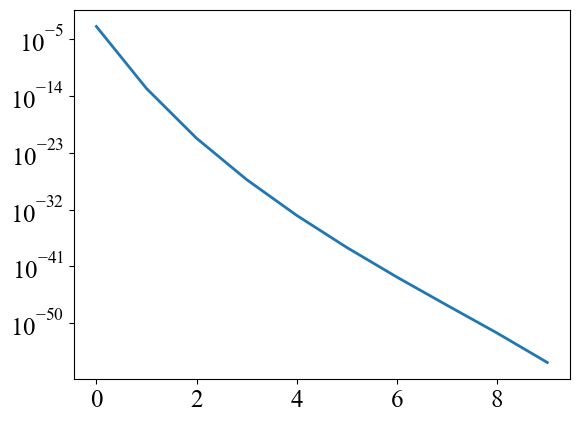

In [15]:
plt.plot(range(n_den), temp)
plt.yscale('log')

In [16]:
def f(x, mu, sigma):
    return (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

def f2(x):
    return x**2 * np.exp(-x)

In [20]:
n_den = 20
x, w = laggauss(n_den)

avg_yield_closed_form = 0

temp = np.zeros(n_den)

for kdx in range(n_den):
    temp[kdx] = (
        w[kdx] * np.exp(x[kdx])
        * f(x[kdx], mu=0, sigma=0.25)
    )
    avg_yield_closed_form += temp[kdx]
    # temp[kdx] = w[kdx] * np.exp(x[kdx])
    print(kdx, avg_yield_closed_form)


avg_yield, _ = quad(f, 0, np.inf, args=(0, 0.25))

print(avg_yield, avg_yield_closed_form)

0 1.5300153253901948e-24
1 0.0007296551868699577
2 1.093441200530663
3 1.1801589291014742
4 1.1803487704380058
5 1.1803488609478956
6 1.180348860969812
7 1.180348860969816
8 1.180348860969816
9 1.180348860969816
10 1.180348860969816
11 1.180348860969816
12 1.180348860969816
13 1.180348860969816
14 1.180348860969816
15 1.180348860969816
16 1.180348860969816
17 1.180348860969816
18 1.180348860969816
19 1.180348860969816
1.0000000000000002 1.180348860969816
